In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

cnx = sqlite3.connect('/kaggle/input/188-million-us-wildfires/FPA_FOD_20170508.sqlite')

In [38]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE_CLASS FROM 'Fires'", cnx)
print(df.head()) #check the data

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

  FIRE_SIZE_CLASS  
0               A  
1               A  
2               A  
3               A  
4               A  


In [39]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

  FIRE_SIZE_CLASS       DATE  
0               A 2005-02-02  
1               A 2004-05-12  
2               A 2004-05-31  
3               A 2004-06-28  
4               A 2004-06-28  


In [40]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday
df_orig = df.copy() #I will use this copy later
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

  FIRE_SIZE_CLASS       DATE  MONTH  DAY_OF_WEEK  
0               A 2005-02-02      2            2  
1               A 2004-05-12      5            2  
2               A 2004-05-31      5            0  
3               A 2004-06-28      6            0  
4               A 2004-06-28      6            0  


In [41]:
df_CA = df[df['STATE']=='CA']
df_GA = df[df['STATE']=='GA']
df_TX = df[df['STATE']=='TX']

In [42]:
from numpy import loadtxt
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
from xgboost import plot_importance

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_CA_copy = df_CA
le.fit(df_CA_copy['STAT_CAUSE_DESCR'])
df_CA_copy['STAT_CAUSE_DESCR'] = le.transform(df_CA_copy['STAT_CAUSE_DESCR'])

le1 = preprocessing.LabelEncoder()
le1.fit(df_CA_copy['FIRE_SIZE_CLASS'])
df_CA_copy['FIRE_SIZE_CLASS'] = le1.transform(df_CA_copy['FIRE_SIZE_CLASS'])

df_CA_copy.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE_CLASS,DATE,MONTH,DAY_OF_WEEK
0,2005,7,40.036944,-121.005833,CA,2453403.5,0,2005-02-02,2,2
1,2004,6,38.933056,-120.404444,CA,2453137.5,0,2004-05-12,5,2
2,2004,3,38.984167,-120.735556,CA,2453156.5,0,2004-05-31,5,0
3,2004,6,38.559167,-119.913333,CA,2453184.5,0,2004-06-28,6,0
4,2004,6,38.559167,-119.933056,CA,2453184.5,0,2004-06-28,6,0


In [47]:
df_CA_copy = df_CA
print(len(df_CA_copy))
df_CA_copy = df_CA_copy.sample(frac = 0.1)
len(df_CA_copy)

189550


18955

In [60]:
X = df_CA_copy[['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'LATITUDE','LONGITUDE','MONTH','DAY_OF_WEEK']]
Y = df_CA_copy['FIRE_SIZE_CLASS']
print(len(X))

189550


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'LATITUDE','LONGITUDE','MONTH','DAY_OF_WEEK']] = scaler.fit_transform(X[['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'LATITUDE','LONGITUDE','MONTH','DAY_OF_WEEK']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:
X

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,MONTH,DAY_OF_WEEK
0,2005,7,40.036944,-121.005833,2,2
1,2004,6,38.933056,-120.404444,5,2
2,2004,3,38.984167,-120.735556,5,0
3,2004,6,38.559167,-119.913333,6,0
4,2004,6,38.559167,-119.933056,6,0
...,...,...,...,...,...,...
1880460,2015,8,40.481637,-122.389375,9,5
1880461,2015,7,37.617619,-120.938570,10,0
1880462,2015,8,37.617619,-120.938570,5,5
1880463,2015,8,37.672235,-120.898356,10,2


[Text(0.5, 0, 'FIRE_YEAR'),
 Text(1.5, 0, 'STAT_CAUSE_DESCR'),
 Text(2.5, 0, 'LATITUDE'),
 Text(3.5, 0, 'LONGITUDE'),
 Text(4.5, 0, 'MONTH'),
 Text(5.5, 0, 'DAY_OF_WEEK')]

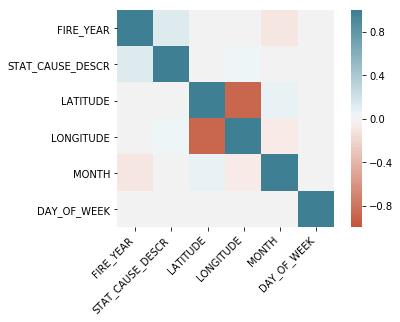

In [62]:
##correlation analysis
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [63]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [64]:
y_train

1143169    2
1108274    0
192070     0
158692     0
22885      0
          ..
1067901    1
317288     1
49513      0
313518     1
367847     1
Name: FIRE_SIZE_CLASS, Length: 126998, dtype: int64

In [65]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 7,               # 类别数，与 multisoftmax 并用
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 8,               # 构建树的深度，越大越容易过拟合
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.005,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}

dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)
#pred = model.predict(dtest)


In [66]:
dtest = xgb.DMatrix(X_test, y_test)
pred = model.predict(dtest)

In [67]:
print(pred)
print(y_test)

[0. 0. 1. ... 1. 0. 1.]
1130556    0
1496498    0
1144225    0
1070146    1
1127536    1
          ..
317485     0
1107505    0
1085708    1
318171     0
1076556    1
Name: FIRE_SIZE_CLASS, Length: 62552, dtype: int64


In [57]:
y_test.shape[0]

6256

In [68]:
error_rate = np.sum(pred != y_test.squeeze().values)*1.0 / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

Test error using softmax = 0.3977810461695869


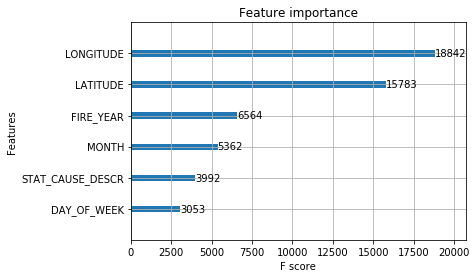

In [69]:
plot_importance(model)
plt.show()

In [ ]:
print(X)
print(Y)